In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [68]:
tmp = pd.read_html('https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8#%D0%9D%D0%B0%D1%80%D0%BE%D0%B4%D0%B6%D1%83%D0%B2%D0%B0%D0%BD%D1%96%D1%81%D1%82%D1%8C',  thousands='.', decimal = ',')[10]
print(tmp.head())


             Регіон  1950  1960  1970  1990  2000  2012  2014  2019
0              Крим  23.0  20.6  16.0  13.0   7.3  12.6     —     —
1         Вінницька  22.4  19.2  14.2  12.4   8.4  11.2  10.9   7.6
2         Волинська  24.7  25.0  17.9  15.3  11.2  14.8  14.1  10.1
3  Дніпропетровська  20.4  20.4  15.1  12.3   7.1  11.2  11.1   7.1
4          Донецька  27.1  21.4  14.0  10.9   6.1   9.8   8.2     —


In [25]:
print(tmp.shape)

(28, 9)


In [69]:
tmp.replace('—', np.NaN, inplace=True)
tmp.head()

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,23.0,20.6,16.0,13.0,7.3,12.6,NaN,NaN
1,Вінницька,22.4,19.2,14.2,12.4,8.4,11.2,10.9,7.6
2,Волинська,24.7,25.0,17.9,15.3,11.2,14.8,14.1,10.1
3,Дніпропетровська,20.4,20.4,15.1,12.3,7.1,11.2,11.1,7.1
4,Донецька,27.1,21.4,14.0,10.9,6.1,9.8,8.2,NaN


In [58]:
print(tmp.info())
print(tmp)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Регіон  28 non-null     object 
 1   1950    26 non-null     float64
 2   1960    27 non-null     float64
 3   1970    27 non-null     float64
 4   1990    28 non-null     float64
 5   2000    28 non-null     float64
 6   2012    28 non-null     float64
 7   2014    28 non-null     object 
 8   2019    28 non-null     object 
dtypes: float64(6), object(3)
memory usage: 2.1+ KB
None
               Регіон  1950  1960  1970  1990  2000  2012  2014  2019
0                Крим  23.0  20.6  16.0  13.0   7.3  12.6   Nan   Nan
1           Вінницька  22.4  19.2  14.2  12.4   8.4  11.2  10.9   7.6
2           Волинська  24.7  25.0  17.9  15.3  11.2  14.8  14.1  10.1
3    Дніпропетровська  20.4  20.4  15.1  12.3   7.1  11.2  11.1   7.1
4            Донецька  27.1  21.4  14.0  10.9   6.1   9.8   8.2   7.1
5         Жито

In [70]:
print(tmp.dtypes)

Регіон     object
1950      float64
1960      float64
1970      float64
1990      float64
2000      float64
2012      float64
2014       object
2019       object
dtype: object


In [71]:
tmp = tmp.astype("float64", errors='ignore')
print(tmp.dtypes)

Регіон     object
1950      float64
1960      float64
1970      float64
1990      float64
2000      float64
2012      float64
2014      float64
2019      float64
dtype: object


In [72]:
miss_part = pd.isnull(tmp)
miss_part.sum()

Регіон    0
1950      2
1960      1
1970      1
1990      0
2000      0
2012      0
2014      2
2019      4
dtype: int64

In [74]:
tmp.drop([27], inplace = True)
print(tmp)

               Регіон  1950  1960  1970  1990  2000  2012  2014  2019
0                Крим  23.0  20.6  16.0  13.0   7.3  12.6   NaN   NaN
1           Вінницька  22.4  19.2  14.2  12.4   8.4  11.2  10.9   7.6
2           Волинська  24.7  25.0  17.9  15.3  11.2  14.8  14.1  10.1
3    Дніпропетровська  20.4  20.4  15.1  12.3   7.1  11.2  11.1   7.1
4            Донецька  27.1  21.4  14.0  10.9   6.1   9.8   8.2   NaN
5         Житомирська  26.1  22.3  15.9  12.9   8.9  12.2  12.0   7.9
6        Закарпатська  31.4  27.3  20.7  16.8  11.5  15.1  14.6  10.4
7          Запорізька  21.9  19.7  15.0  12.4   7.1  10.6  10.6   6.8
8   Івано-Франківська  24.3  24.8  18.2  15.5  10.3  12.4  12.2   8.8
9            Київська  20.4  18.9  15.6  12.3   7.3  12.2  12.1   8.0
10     Кіровоградська  21.6  17.1  14.5  12.6   7.9  11.0  10.8   6.8
11          Луганська  26.2  23.5  14.4  11.6   6.2   9.6   5.1   NaN
12          Львівська  23.4  24.0  17.1  14.0   9.1  11.9  11.9   8.7
13       Миколаївськ

In [87]:
tmp['1950'].fillna(tmp['1950'].mean(), inplace = True)
tmp['1960'].fillna(tmp['1960'].mean(), inplace = True)
tmp['1970'].fillna(tmp['1970'].mean(), inplace = True)
tmp['1990'].fillna(tmp['1990'].mean(), inplace = True)
tmp['2000'].fillna(tmp['2000'].mean(), inplace = True)
tmp['2012'].fillna(tmp['2012'].mean(), inplace = True)
tmp['2014'].fillna(tmp['2014'].mean(), inplace = True)
tmp['2019'].fillna(tmp['2019'].mean(), inplace = True)
print(tmp.to_string())

               Регіон    1950       1960  1970  1990  2000  2012    2014       2019
0                Крим  23.000  20.600000  16.0  13.0   7.3  12.6  11.144   8.017391
1           Вінницька  22.400  19.200000  14.2  12.4   8.4  11.2  10.900   7.600000
2           Волинська  24.700  25.000000  17.9  15.3  11.2  14.8  14.100  10.100000
3    Дніпропетровська  20.400  20.400000  15.1  12.3   7.1  11.2  11.100   7.100000
4            Донецька  27.100  21.400000  14.0  10.9   6.1   9.8   8.200   8.017391
5         Житомирська  26.100  22.300000  15.9  12.9   8.9  12.2  12.000   7.900000
6        Закарпатська  31.400  27.300000  20.7  16.8  11.5  15.1  14.600  10.400000
7          Запорізька  21.900  19.700000  15.0  12.4   7.1  10.6  10.600   6.800000
8   Івано-Франківська  24.300  24.800000  18.2  15.5  10.3  12.4  12.200   8.800000
9            Київська  20.400  18.900000  15.6  12.3   7.3  12.2  12.100   8.000000
10     Кіровоградська  21.600  17.100000  14.5  12.6   7.9  11.0  10.800   6

In [88]:
column_2014 = tmp['2014']
column_2014.max()

14.8

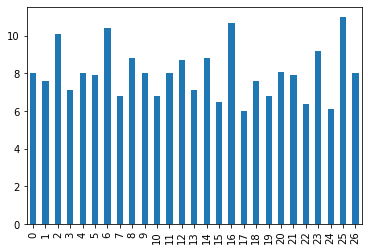

In [91]:
tmp['2019'].plot(kind = 'bar')
plt.show()